In [111]:
# Importig Pandas
import pandas as pd

# Importig Matplotlib
import matplotlib.pyplot as plt

# Importing Numpy
import numpy as np


In [112]:
# Creates a set of random latitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

# Creates a set of random longitude combinations.
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Zips together under a new variable name both the 'lats' and 'lngs' variables.
lat_lngs = zip(lats, lngs)

# Prints out the output of the new variable name .
lat_lngs 

# -  The zip object packs each pair of lats and lngs having the 
#same index in their respective array into a tuple


In [113]:
# Create a practice set of random latitude and longitude combinations.

# Latitude combination.
x=[25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]

# Longitude combination.
y=[-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

# Zipping together both combinations.
coordinates=zip(x,y)


In [114]:
# Use the tuple() function to display the latitude
# and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [115]:
# Use the citipy module to determine city based on latitude and longitude.
# Imports citypy into the module.
from citipy import citipy

In [116]:
# Imports the Sys module
import sys

# Checks the version of the sys module.
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]'

In [117]:
# Use the tuple() function to display the latitude and
# longitude combinations of city_name and country_code.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [118]:
# Create a list for holding the cities.
cities = []

# We iterate using a for loop through the lat_lngs tuple, as in our 
# practice, and retrieve the nearest city using the latitude
# and longitude pair.

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count.
len(cities)

#     Breaking down the code
# 1. We create a cities list to store city names.


618

In [119]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [120]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a


In [121]:
# Create an endpoint URL for a city.
city_url= url + "&q=" + "Boston"

# Prints out the endpoint URL
print(city_url)

#  - we are creating a string to get the weather data for
# Boston by using the city_url

#  - To create the city_url we add the parameter, &q= and 
# “Boston” to the url.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a&q=Boston


In [122]:
# Make a 'Get' request for the city weather.
city_weather= requests.get(city_url)

# Prints out the 'Get' request.
city_weather

<Response [200]>

In [123]:
# call the response code with the get() method using the 
# status_code

city_weather.status_code

200

In [124]:
# Create an endpoint URL for a city.
# With Incorrect spelling of the city.

city_url= url + "&q=" + "Bston"
city_weather= requests.get(city_url)
city_weather

<Response [404]>

In [125]:
# Create an endpoint URL for a city.
# With Correct spelling of the city.

city_url= url + "&q=" + "Boston"
city_weather= requests.get(city_url)
city_weather

<Response [200]>

In [126]:
# Get a text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":32.23,"pressure":1027,"humidity":86,"temp_min":27,"temp_max":37.99},"visibility":16093,"wind":{"speed":4.7,"deg":234},"rain":{},"clouds":{"all":1},"dt":1573101337,"sys":{"type":1,"id":5255,"country":"US","sunrise":1573039407,"sunset":1573075935},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [127]:
# Get a JSON of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.23,
  'pressure': 1027,
  'humidity': 86,
  'temp_min': 27,
  'temp_max': 37.99},
 'visibility': 16093,
 'wind': {'speed': 4.7, 'deg': 234},
 'rain': {},
 'clouds': {'all': 1},
 'dt': 1573101337,
 'sys': {'type': 1,
  'id': 5255,
  'country': 'US',
  'sunrise': 1573039407,
  'sunset': 1573075935},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [128]:
# Create an endpoint URL for a city.
city_url + "&q=" + "Boston"
city_weather= requests.get(city_url)
if city_weather.status_code== 200:
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather found.


In [129]:
# Create an endpoint URL for a city.
city_url + "&q=" + "Bston"
city_weather= requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather found.


In [130]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a&q=Boston


In [131]:
# Get the JSON data.
boston_data= city_weather.json()
boston_data

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.23,
  'pressure': 1027,
  'humidity': 86,
  'temp_min': 27,
  'temp_max': 37.99},
 'visibility': 16093,
 'wind': {'speed': 4.7, 'deg': 234},
 'rain': {},
 'clouds': {'all': 1},
 'dt': 1573101337,
 'sys': {'type': 1,
  'id': 5255,
  'country': 'US',
  'sunrise': 1573039407,
  'sunset': 1573075935},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [132]:
boston_data["sys"]["country"]

'US'

In [133]:
boston_data["dt"]

1573101337

In [134]:
# Creates a Variable name for Latitude Information.
lat= boston_data["coord"]["lat"]

# Creates a Variable name for Longitude Information.
lng= boston_data["coord"]["lon"]

# Creates a Variable name for Max Tempature Information.
max_temp= boston_data["main"]["temp_max"]

# Creates a Variable name for Humidity Information.
humidity= boston_data["main"]["humidity"]

# Creates a Variable name for Clouds Information.
clouds= boston_data["clouds"]["all"]

# Creates a Variable name for Latitude Information.
wind= boston_data["wind"]["speed"]

# Prints out the information inside the Variable names 
# created in this cell.
print(lat,lng,max_temp,humidity,clouds,wind)

42.36 -71.06 37.99 86 1 4.7


In [135]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date= boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, 
# hours, minutes and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2019-11-07 04:35:37'

In [136]:
# Build the basic URL for the OpenWeatherMap with your weather-
#_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Declares the url variable.
print(url)

# Declares the city_url variable.
city_url= url + "&q=" + "Boston"

# Prints the city_url variable.
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a&q=Boston


In [137]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [138]:
# Creates an empty list to hold the  data.
city_data=[]

# Print the beginning of the logging.
print("Beginning Data Retrieval  ")
print("--------------------------")

# Create the counters.
# we have initialized the counters at 1 because we want the 
#first iteration of the logging for each recorded response
record_count=1

# Set to start at 1.
set_count=1

Beginning Data Retrieval  
--------------------------


In [139]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [140]:
import numpy as np

np.random.seed(42)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs 

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [141]:

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47ea430ffbc6a3d7f5e1667d3293f52a


In [142]:
city_data = []
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    
    # Run API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        print('City found , max temp was ', city_max_temp)
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

City found , max temp was  60.53
City not found. Skipping...
City found , max temp was  35.6
City found , max temp was  48.2
City found , max temp was  33.8
City found , max temp was  47.25
City found , max temp was  59.79
City found , max temp was  32
City not found. Skipping...
City found , max temp was  52.03
City found , max temp was  39.2
City found , max temp was  -11.48
City found , max temp was  37.62
City found , max temp was  77
City found , max temp was  34.03
City not found. Skipping...
City found , max temp was  83.71
City found , max temp was  63.84
City found , max temp was  78.8
City found , max temp was  80.6
City found , max temp was  91.4
City found , max temp was  60.8
City found , max temp was  58.93
City found , max temp was  68.9
City found , max temp was  15.8
City found , max temp was  35.6
City found , max temp was  48.9
City not found. Skipping...
City found , max temp was  59
City not found. Skipping...
City found , max temp was  62.01
City found , max temp 

City found , max temp was  73
City found , max temp was  26.6
City not found. Skipping...
City found , max temp was  28.54
City found , max temp was  46
City not found. Skipping...
City found , max temp was  82.4
City found , max temp was  64.4
City not found. Skipping...
City found , max temp was  83.75
City found , max temp was  73.4
City found , max temp was  38.77
City found , max temp was  78.8
City found , max temp was  12.2
City found , max temp was  83.7
City found , max temp was  21.2
City found , max temp was  51.91
City found , max temp was  19.4
City found , max temp was  72.1
City not found. Skipping...
City found , max temp was  60.01
City found , max temp was  53.6
City found , max temp was  66.4
City found , max temp was  63
City found , max temp was  50
City found , max temp was  83.16
City found , max temp was  36
City found , max temp was  67.95
City found , max temp was  73
City found , max temp was  14
City found , max temp was  60.01
City found , max temp was  29.

City found , max temp was  78.8
City found , max temp was  78.8
City found , max temp was  73.4
City found , max temp was  6.8
City found , max temp was  3.99
City found , max temp was  58.48
City found , max temp was  76.84
City found , max temp was  41.23
City found , max temp was  77.4
City found , max temp was  69.26
City not found. Skipping...
City found , max temp was  35.28
City found , max temp was  73.33
City found , max temp was  77
City found , max temp was  70.14
City found , max temp was  60.01
City found , max temp was  42.8
City not found. Skipping...
City found , max temp was  58.5
City found , max temp was  21
City found , max temp was  45.39
City not found. Skipping...
City found , max temp was  72.32
City found , max temp was  86.67
City found , max temp was  78.8
City found , max temp was  15.03
City found , max temp was  71.94
City found , max temp was  41
City found , max temp was  54.7
City found , max temp was  3.65
City found , max temp was  50
City found , max

In [105]:
len(cities)

597

In [143]:
len(city_data)

534

In [144]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.12,14.28,60.53,77,52,5.44,NA,2019-11-07 04:34:45
1,Bethel,60.79,-161.76,35.60,90,90,11.41,US,2019-11-07 04:34:45
2,Saint-Francois,46.42,3.91,48.20,76,99,9.17,FR,2019-11-07 04:34:46
3,Ushuaia,-54.81,-68.31,33.80,100,90,26.40,AR,2019-11-07 04:30:51
4,Mar Del Plata,-46.43,-67.52,47.25,34,0,27.42,AR,2019-11-07 04:34:46
5,Kruisfontein,-34.00,24.73,59.79,64,74,27.69,ZA,2019-11-07 04:34:46
6,Bronnoysund,65.46,12.20,32.00,65,100,10.29,NO,2019-11-07 04:34:46
7,Yumen,40.29,97.04,52.03,36,51,21.30,CN,2019-11-07 04:34:47
8,Albany,42.65,-73.75,39.20,48,90,6.93,US,2019-11-07 04:30:03
9,Dikson,73.51,80.55,-11.48,93,1,12.44,RU,2019-11-07 04:34:48


In [145]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [146]:
#city_data_df
len(city_data_df)
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.12,14.28,60.53,77,52,5.44,NA,2019-11-07 04:34:45
1,Bethel,60.79,-161.76,35.60,90,90,11.41,US,2019-11-07 04:34:45
2,Saint-Francois,46.42,3.91,48.20,76,99,9.17,FR,2019-11-07 04:34:46
3,Ushuaia,-54.81,-68.31,33.80,100,90,26.40,AR,2019-11-07 04:30:51
4,Mar Del Plata,-46.43,-67.52,47.25,34,0,27.42,AR,2019-11-07 04:34:46
...,...,...,...,...,...,...,...,...,...
529,Vredendal,-31.68,18.49,59.95,56,45,11.39,ZA,2019-11-07 04:37:15
530,Kushima,31.50,131.29,73.40,38,75,11.41,JP,2019-11-07 04:37:16
531,Eirunepe,-6.66,-69.87,71.76,99,59,1.50,BR,2019-11-07 04:37:16
532,Tocopilla,-22.09,-70.20,55.65,38,17,5.44,CL,2019-11-07 04:37:16


In [147]:
# Extract relevant fields from the DataFrame for plotting.
lats= city_data_df["Lat"]
max_temp= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

In [150]:
# Import the time module.
import time

# Get today's date in seconds.
today= time.strftime("%x")
today

'11/06/19'

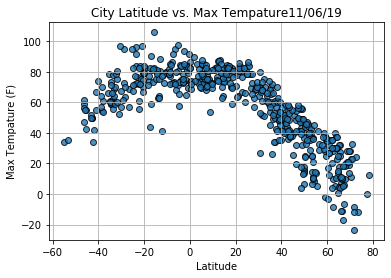

In [160]:
# Build the scatter plot for latitude vs.Max Tempature.
plt.scatter(lats,
            max_temp,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Tempature" + time.strftime("%x"))
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

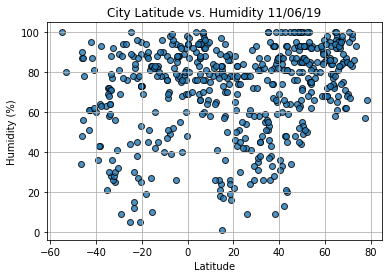

In [161]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

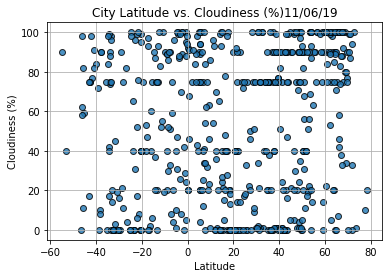

In [164]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

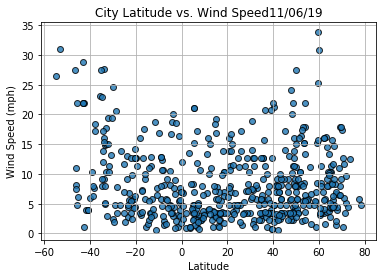

In [165]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()